# Final Project Covid Data
## Ajuni Sohota

In [84]:
from os import chdir
from glob import glob
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import thinkplot


import thinkplot
import thinkstats2
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.formula.api as smf
import statsmodels.api as sm

from scipy.stats import norm
from matplotlib import pyplot as plt
from thinkstats2 import Mean, MeanVar, Var, Std, Cov


In [210]:
# rename headers

header_names=['Date', 'State', 'CovidPos', 'CovidNeg', 'Pending', "In Hospital", 'CumulativeHospitalized', 'IncluCur', 'IncluCum', 'OnVent', 'OnVentCum', 'Recovered', 'Hash', 'DateChecked', 'Deaths', 'Hospitalized', 'Total', 'TotalTestResults', 'PosNeg', 'Fips', 'DeathsIncreasedBy', 'HospitalizedIncreasedBy', 'NegativeIncreasedBy', 'PositiveIncreasedBy', 'TotalTestResultsIncreasedBy']

df = pd.read_csv("us_states_covid19_daily.csv", header=None, skiprows=1, names=header_names)
df.head()



,Date,State,CovidPos,CovidNeg,Pending,In Hospital,CumulativeHospitalized,IncluCur,IncluCum,OnVent,...,Hospitalized,Total,TotalTestResults,PosNeg,Fips,DeathsIncreasedBy,HospitalizedIncreasedBy,NegativeIncreasedBy,PositiveIncreasedBy,TotalTestResultsIncreasedBy
0,20200503,AK,368.0,21210.0,NaN,12.0,NaN,NaN,NaN,NaN,...,NaN,21578.0,21578.0,21578.0,2,0.0,0.0,176.0,3.0,179.0
1,20200503,AL,7725.0,84775.0,NaN,NaN,1035.0,NaN,403.0,NaN,...,1035.0,92500.0,92500.0,92500.0,1,2.0,12.0,0.0,291.0,291.0
2,20200503,AR,3431.0,49459.0,NaN,100.0,427.0,NaN,NaN,20.0,...,427.0,52890.0,52890.0,52890.0,5,3.0,13.0,1249.0,59.0,1308.0
3,20200503,AS,0.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,57.0,57.0,57.0,60,0.0,0.0,0.0,0.0,0.0
4,20200503,AZ,8640.0,72479.0,NaN,732.0,1348.0,282.0,NaN,192.0,...,1348.0,81119.0,81119.0,81119.0,4,14.0,9.0,2846.0,276.0,3122.0


In [211]:
df.info()
df.isnull().sum()
df.fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         3321 non-null   int64  
 1   State                        3321 non-null   object 
 2   CovidPos                     3306 non-null   float64
 3   CovidNeg                     3140 non-null   float64
 4   Pending                      677 non-null    float64
 5   In Hospital                  1191 non-null   float64
 6   CumulativeHospitalized       1239 non-null   float64
 7   IncluCur                     594 non-null    float64
 8   IncluCum                     232 non-null    float64
 9   OnVent                       471 non-null    float64
 10  OnVentCum                    72 non-null     float64
 11  Recovered                    1037 non-null   float64
 12  Hash                         3321 non-null   object 
 13  DateChecked       

,Date,State,CovidPos,CovidNeg,Pending,In Hospital,CumulativeHospitalized,IncluCur,IncluCum,OnVent,...,Hospitalized,Total,TotalTestResults,PosNeg,Fips,DeathsIncreasedBy,HospitalizedIncreasedBy,NegativeIncreasedBy,PositiveIncreasedBy,TotalTestResultsIncreasedBy
0,20200503,AK,368.0,21210.0,0.0,12.0,0.0,0.0,0.0,0.0,...,0.0,21578.0,21578.0,21578.0,2,0.0,0.0,176.0,3.0,179.0
1,20200503,AL,7725.0,84775.0,0.0,0.0,1035.0,0.0,403.0,0.0,...,1035.0,92500.0,92500.0,92500.0,1,2.0,12.0,0.0,291.0,291.0
2,20200503,AR,3431.0,49459.0,0.0,100.0,427.0,0.0,0.0,20.0,...,427.0,52890.0,52890.0,52890.0,5,3.0,13.0,1249.0,59.0,1308.0
3,20200503,AS,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,57.0,57.0,57.0,60,0.0,0.0,0.0,0.0,0.0
4,20200503,AZ,8640.0,72479.0,0.0,732.0,1348.0,282.0,0.0,192.0,...,1348.0,81119.0,81119.0,81119.0,4,14.0,9.0,2846.0,276.0,3122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,20200126,WA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
3317,20200125,WA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
3318,20200124,WA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
3319,20200123,WA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0


### Histograms

In [212]:
def makeHist(dataframe, variables: list, hist_titles: list):
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.8, wspace=0.5)
    fig.set_size_inches(15, 15)

    i = 1
    for var in variables:
        fig.add_subplot(3, 3, i)
        sb.distplot(pd.Series(dataframe[var], name=histLabels[i-1]), fit=norm, kde=False).set_title(var + " Histogram")
        i += 1

    fig.tight_layout()
    plt.show()

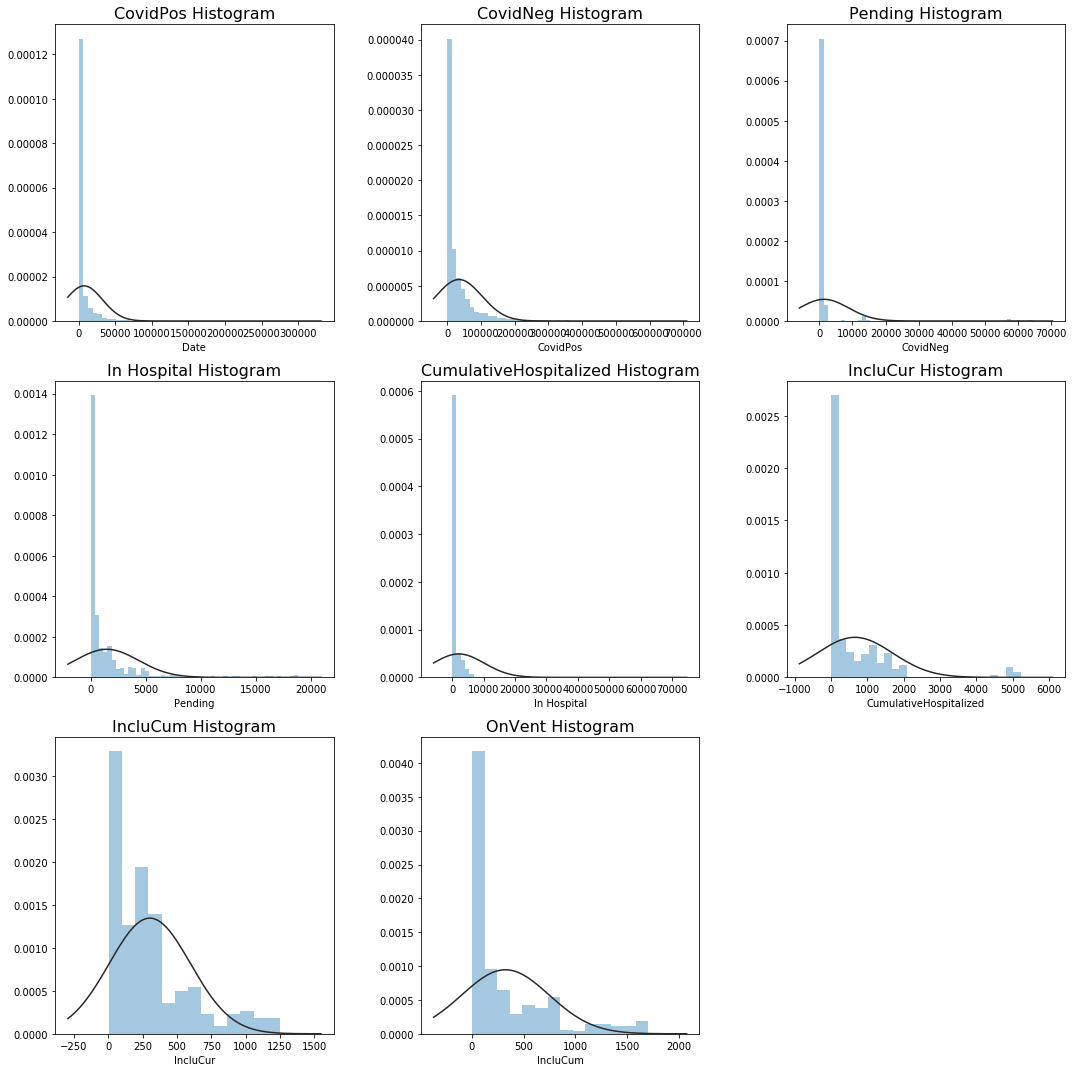

In [213]:
variables = ['CovidPos', 'CovidNeg', 'Pending', "In Hospital", 'CumulativeHospitalized', 'IncluCur', 'IncluCum', 'OnVent']

hist_titles = ['CovidPos', 'CovidNeg', 'Pending', "In Hospital", 'CumulativeHospitalized', 'IncluCur', 'IncluCum', 'OnVent']

makeHist(df, variables, hist_titles)

### Variables to Use:

Date: The date the information was collected for. Format is year,month,day


State: Known abbreviations for the state the data is collected for


CovidPos: The amount of people that tested Covid Positive


CovidNeg: The amount of people that tested Covid Negative

NegativeIncreasedBy:  How many more negative cases reported than the previous day


PositiveIncreasedBy: How many more positive cases reported than the previous day

In Hospital: How many people are in the hospital on that date

The mean for CovidPos variable is 7223.9422262552935
The mode for CovidPos variable is 0    0.0
dtype: float64
The histogram is left skewed.
The variance is 636900362.3273735
The standard deviation is 25236.88495689144


/Users/ajunisohota/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ajunisohota/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


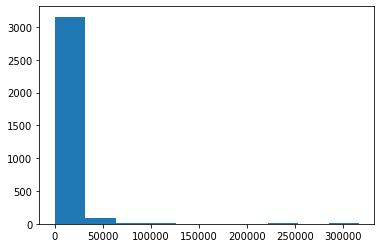

In [233]:
plt.hist(df.CovidPos)
print("The mean for CovidPos variable is", df["CovidPos"].mean())
print("The mode for CovidPos variable is", df["CovidPos"].mode())
print("The histogram is left skewed.")
print("The variance is", df["CovidPos"].var())
print("The standard deviation is", df["CovidPos"].std())



The mean for CovidNeg variable is 34551.0025477707
The mode for CovidNeg variable is 0    3.0
dtype: float64
The histogram is left skewed.
The variance is 4581084050.969728
The standard deviation is 67683.70594884509


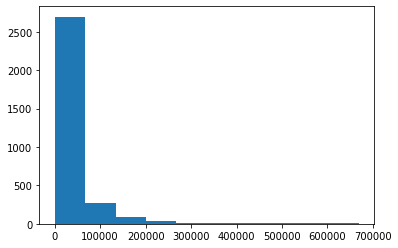

In [234]:
plt.hist(df.CovidNeg)
print("The mean for CovidNeg variable is", df["CovidNeg"].mean())
print("The mode for CovidNeg variable is", df["CovidNeg"].mode())
print("The histogram is left skewed.")
print("The variance is", df["CovidNeg"].var())
print("The standard deviation is", df["CovidNeg"].std())



The mean for NegativeIncreasedBy variable is 1807.144563552833
The mode for NegativeIncreasedBy variable is 0    0.0
dtype: float64
The histogram is left skewed.
The variance is 20444029.559364766
The standard deviation is 4521.507443249958


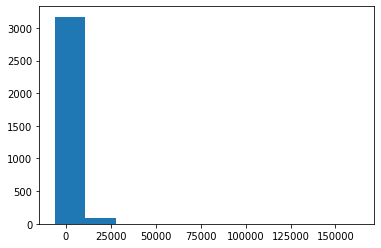

In [235]:
plt.hist(df.NegativeIncreasedBy)
print("The mean for NegativeIncreasedBy variable is", df["NegativeIncreasedBy"].mean())
print("The mode for NegativeIncreasedBy variable is", df["NegativeIncreasedBy"].mode())
print("The histogram is left skewed.")
print("The variance is", df["NegativeIncreasedBy"].var())
print("The standard deviation is", df["NegativeIncreasedBy"].std())





The mean for PositiveIncreasedBy variable is 352.8
The mode for PositiveIncreasedBy variable is 0    0.0
dtype: float64
The histogram is left skewed.
The variance is 949769.9995097987
The standard deviation is 974.5614395766943


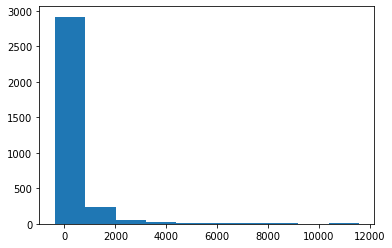

In [236]:
plt.hist(df.PositiveIncreasedBy)
print("The mean for PositiveIncreasedBy variable is", df["PositiveIncreasedBy"].mean())
print("The mode for PositiveIncreasedBy variable is", df["PositiveIncreasedBy"].mode())
print("The histogram is left skewed.")
print("The variance is", df["PositiveIncreasedBy"].var())
print("The standard deviation is", df["PositiveIncreasedBy"].std())





The mean for In Hospital variable is 1449.4811083123425
The mode for In Hospital variable is 0    13.0
1    19.0
dtype: float64
The histogram is left skewed.
The variance is 8274663.012878094
The standard deviation is 2876.5713988841117


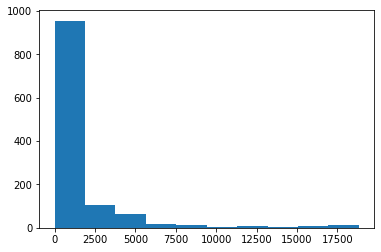

In [237]:
plt.hist(df["In Hospital"])
print("The mean for In Hospital variable is", df["In Hospital"].mean())
print("The mode for In Hospital variable is", df["In Hospital"].mode())
print("The histogram is left skewed.")
print("The variance is", df["In Hospital"].var())
print("The standard deviation is", df["In Hospital"].std())


        
        

I don't want to trim the data, even though it is heavily skewed because of all the zero data. The zero data is real data that represents day to day data, so I don't feel it would be accurate of an analysis to trim it. 

### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [219]:
# Separate data into two sets: data from only CA and data from only NY

CA = df[df['State'] == 'CA']
NY = df[df['State'] == 'NY']

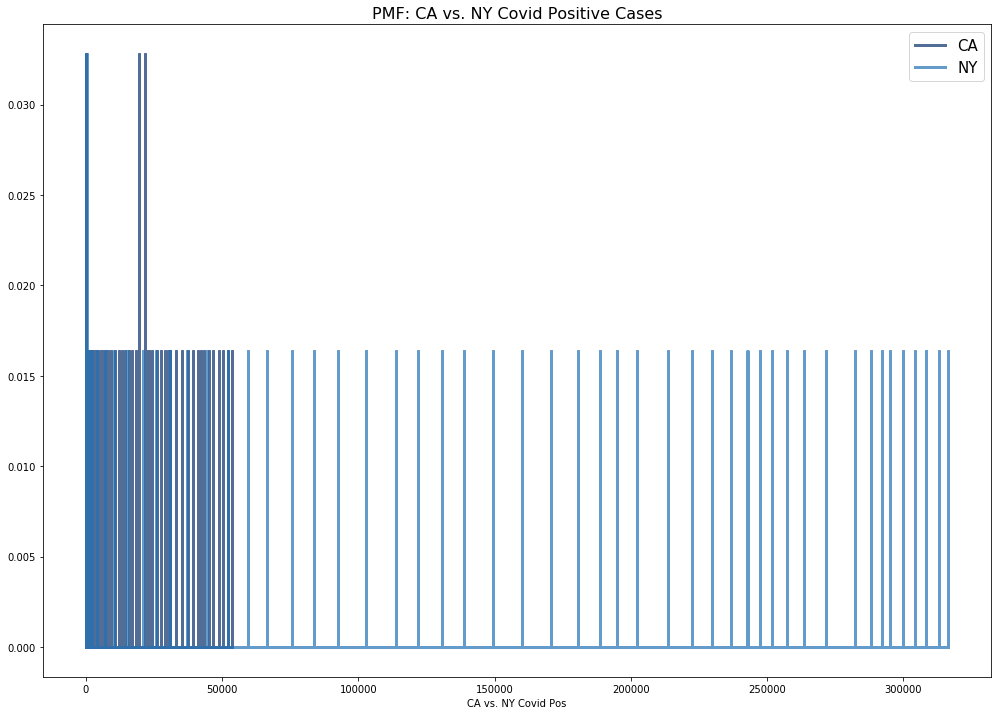

In [220]:
# Specifying the Covid Positive column for CA and NY data
cacovid = thinkstats2.Pmf(CA['CovidPos'], label = 'CA')
nycovid = thinkstats2.Pmf(NY['CovidPos'], label = 'NY')

fig = plt.figure()
plt.rcParams['axes.titlesize'] = 16
fig.set_size_inches(17, 12)


thinkplot.Pmfs([cacovid, nycovid])
thinkplot.Config(title = "PMF: CA vs. NY Covid Positive Cases", xlabel='CA vs. NY Covid Pos')
plt.legend(prop={"size":15})

New York has higher rate numbers of Covid Cases.

### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

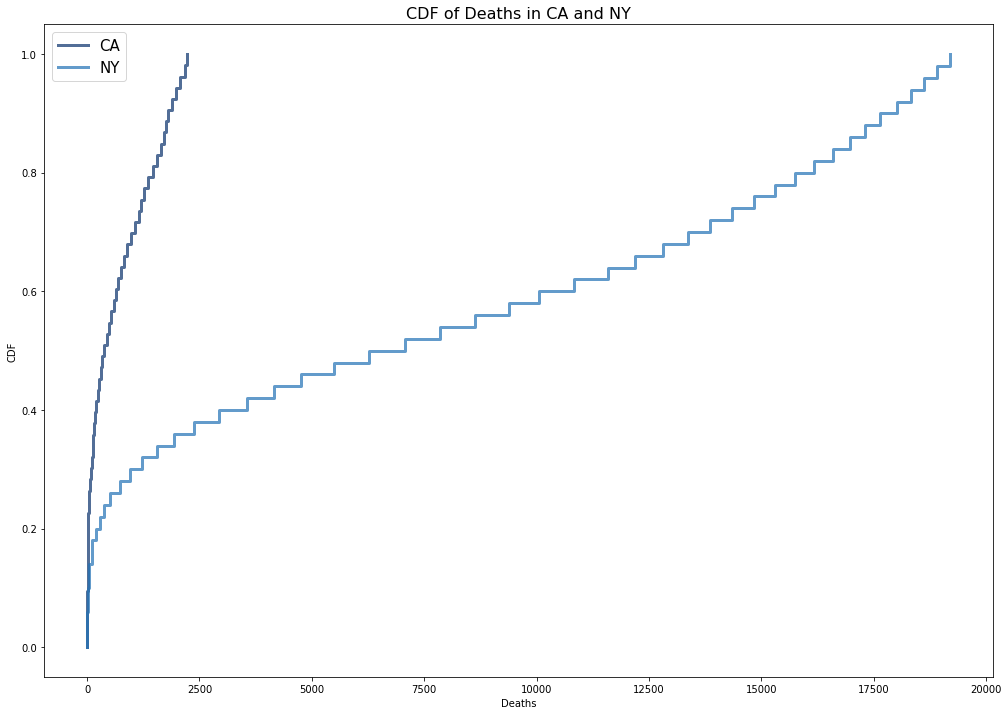

In [221]:
ca_cdf = thinkstats2.Cdf(CA['Deaths'], label = 'CA')
ny_cdf = thinkstats2.Cdf(NY['Deaths'], label = 'NY')

fig = plt.figure()
plt.rcParams['axes.titlesize'] = 16
fig.set_size_inches(17, 12)

thinkplot.Cdfs([ca_cdf, ny_cdf])
thinkplot.Config(title='CDF of Deaths in CA and NY', xlabel='Deaths', ylabel='CDF')
plt.legend(prop={"size":15})

This shows that the death rates are higher in NY but that CA has a faster progression of deaths.

### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

No handles with labels found to put in legend.


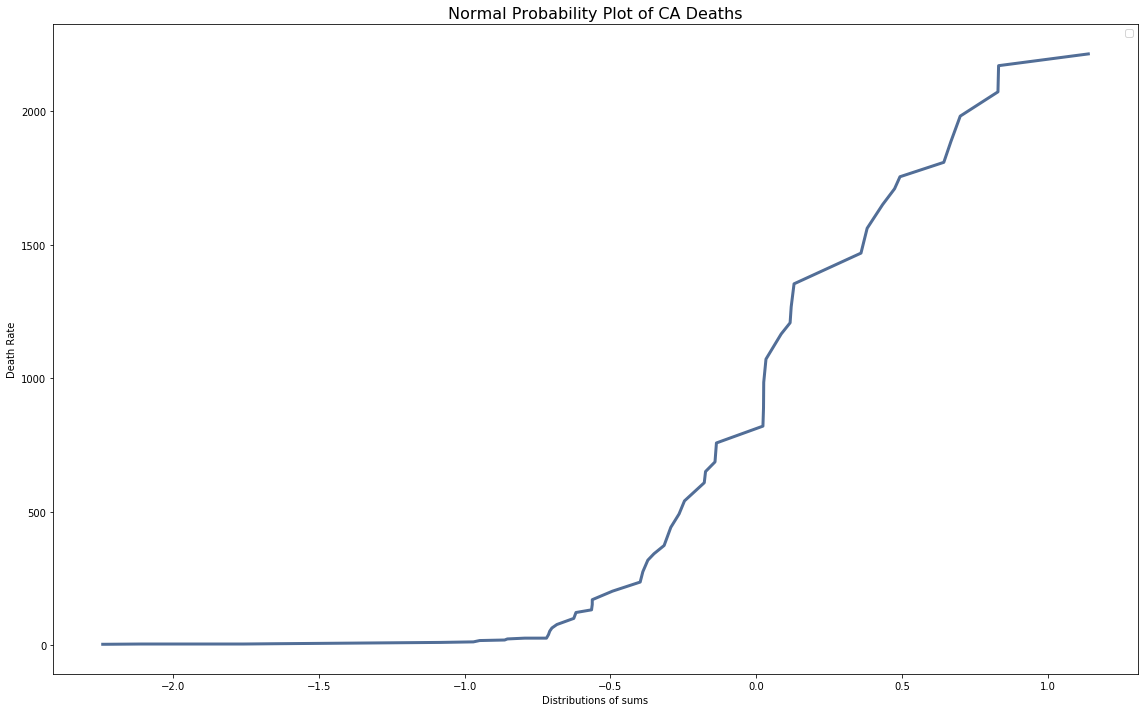

In [222]:

fig = plt.figure()
fig.set_size_inches(16, 10)
fig.subplots_adjust(hspace=0.8, wspace=0.5)

xs, ys = thinkstats2.NormalProbability(CA['Deaths'])
thinkplot.Plot(xs, ys)

thinkplot.Config(title='Normal Probability Plot of CA Deaths',
                     xlabel='Distributions of sums',
                     ylabel='Death Rate')

fig.tight_layout()

It looks like it is not a perfect line which would indicate there si a normal relationship, but instead we see exponential growth. 


### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

In [223]:
def PearsCorr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = thinkstats2.Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    
    return corr

def SpearCorr(xs, ys):
    xranked = pd.Series(xs).rank()
    yranked = pd.Series(ys).rank()
    
    return PearsCorr(xranked, yranked)

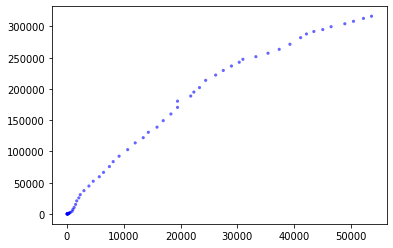

In [224]:
thinkplot.Scatter(CA['CovidPos'], NY['CovidPos'], alpha=.60, s=10)

In [225]:
print("The Pearson's Correlation is:", PearsCorr(CA['CovidPos'], NY['CovidPos']))
print("The Spearmans's Correlation is:", SpearCorr(CA['CovidPos'], NY['CovidPos']))

The Pearson's Correlation is: 0.9818318001646185
The Spearmans's Correlation is: 0.9999338942625295


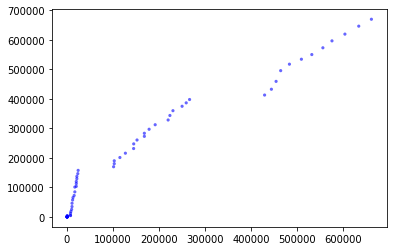

In [226]:
thinkplot.Scatter(CA['CovidNeg'], NY['CovidNeg'], alpha=.60, s=10)

In [227]:
print("The Pearson's Correlation is:", PearsCorr(CA['CovidNeg'], NY['CovidNeg']))
print("The Spearmans's Correlation is:", SpearCorr(CA['CovidNeg'], NY['CovidNeg']))

The Pearson's Correlation is: 0.9700186481628098
The Spearmans's Correlation is: 0.9979213304181881


Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [240]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [245]:
data = CA.CovidPos.values, NY.CovidPos.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

No matter how I choose data for the above hypothesis testing, it will not give me an answer other than 0. I'm not sure what I'm doing wrong but I think I am missing something!

### For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [238]:
df["CovidPos"] = pd.to_numeric(df.CovidPos, errors='coerce')
df["CovidNeg"] = pd.to_numeric(df.CovidNeg, errors='coerce')
df["NegativeIncreasedBy"] = pd.to_numeric(df.NegativeIncreasedBy, errors='coerce')


In [248]:
model = smf.ols('CovidPos ~ CovidNeg', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CovidPos   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     3986.
Date:                Sat, 30 May 2020   Prob (F-statistic):               0.00
Time:                        16:58:42   Log-Likelihood:                -35069.
No. Observations:                3140   AIC:                         7.014e+04
Df Residuals:                    3138   BIC:                         7.015e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2261.3437    343.674     -6.580      0.000   -2935.192   -1587.496
CovidNeg       0.2856      0.005     63.137      0.000       0.277       0.294
==============================================================================
Omnibus:                     2388.878   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171009.932
Skew:                           3.005   Prob(JB):                         0.00
Kurtosis:                      38.651   Cond. No.                     8.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [253]:


model = smf.ols('CovidPos ~ CovidNeg + NegativeIncreasedBy', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CovidPos   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     1980.
Date:                Sat, 30 May 2020   Prob (F-statistic):               0.00
Time:                        17:03:21   Log-Likelihood:                -34712.
No. Observations:                3107   AIC:                         6.943e+04
Df Residuals:                    3104   BIC:                         6.945e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2209.4563    348.270     -6.344      0.000   -2892.319   -1526.593
CovidNeg                0.2989      0.006     48.252      0.000       0.287       0.311
NegativeIncreasedBy    -0.2857      0.091     -3.133      0.002      -0.465      -0.107
==============================================================================
Omnibus:                     2335.186   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163685.685
Skew:                           2.952   Prob(JB):                         0.00
Kurtosis:                      38.065   Cond. No.                     8.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Summary

### A 250-500-word paper summarizing the following:

Statistical/Hypothetical Question

Outcome of your EDA

What do you feel was missed during the analysis?

Were there any variables you felt could have helped in the analysis?

Were there any assumptions made you felt were incorrect?

What challenges did you face, what did you not fully understand?

Submit a link to your repository to the assignment link during the final week of class.

I wanted to see if there was any relationship between Covid Positive results or Covid Negative results. More specifically I wanted to see if CA and NY had any relationship between how many of each positive and negative results. I did think that since the epidemic is likely similarly affecting both California and New York due to them both being heavily traveled through as well as highly populated states. Because I couldn’t figure out how to do the regression analysis on only the CA and NY data, I had to settle with just comparing Covid positive and negative results for all states. One variable that would be useful is the total population for each state. I’m not sure if my assumption to keep the data that is zero which heavily skews the histograms to the left was a good idea, but my justification is that the data that is reported as zero each day is equally as valuable as any day that the reports are not zero.

I couldn't get the Hypothesis Test to result in anything other than zero, so I wasn't able to properly test my hypothesis. I followed the code in the book so ideally it should have worked, but no matter how I tried to enter in differently coded data it still always resulted in zero. 